Machine learning-based prediction of COVID-19 diagnosis based on symptoms

A speedy and accurate diagnosis of COVID-19 is made possible by effective SARS-CoV-2 screening, which can also lessen the burden on healthcare systems. There have been built prediction models that assess the likelihood of infection by combining a number of parameters. These are meant to help medical professionals all over the world treat patients, especially in light of the scarcity of healthcare resources. The current dataset has been downloaded from ‘ABC’ government website and contains around 2,78,848 individuals who have gone through the RT-PCR test. Data set contains 11 columns, including 8 features suspected to play an important role in the prediction of COVID19 outcome. Outcome variable is covid result test positive or negative. We have data from 11th March 2020 till 30th April 2020.

Null Hypothesis
- Random Forest and Decision tree would perform the best.

In [1]:
# Basic libraries
import pandas as pd
import numpy as np

In [2]:
corona=pd.read_csv("/content/corona_tested_006.csv", dtype={'Ind_ID':int,'Cough_symptoms':object,'Fever':object,'Sore_throat':object,'Shortness_of_breath':object,'Headache':object,'Age_60_above':object })

In [3]:
corona.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [4]:
corona.tail()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278843,278844,30-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,positive,None,male,Other
278844,278845,30-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,female,Other
278845,278846,30-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,male,Other
278846,278847,30-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,male,Other
278847,278848,30-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,female,Other


In [5]:
corona.shape

(278848, 11)

In [6]:
corona.describe(include='all')

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848.000000,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,NaN,51,3,3,3,3,3,3,3,3,3
top,NaN,20-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,female,Other
freq,NaN,10921,236368,256844,276921,277270,276433,260227,127320,130158,242741
mean,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,80496.628269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,69712.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,209136.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [8]:
corona.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Count')

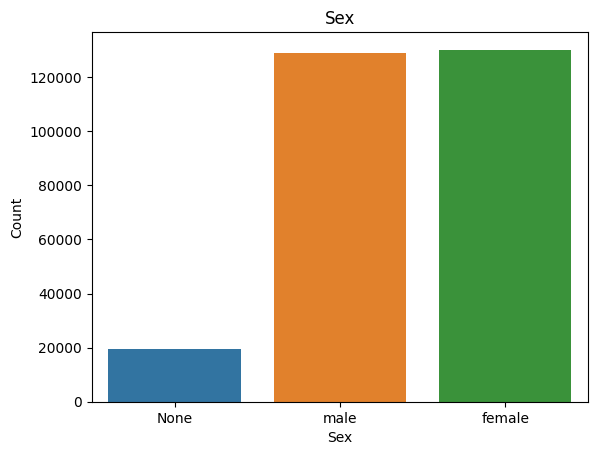

In [10]:
sns.countplot(x='Sex', data=corona)
plt.title('Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

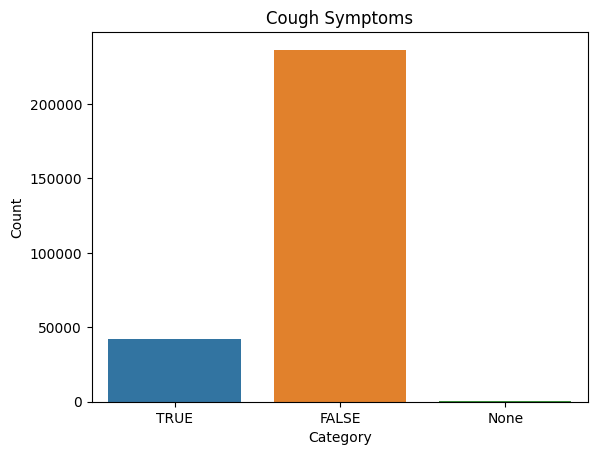

In [11]:
sns.countplot(x='Cough_symptoms', data=corona)
plt.title('Cough Symptoms')
plt.xlabel('Category')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

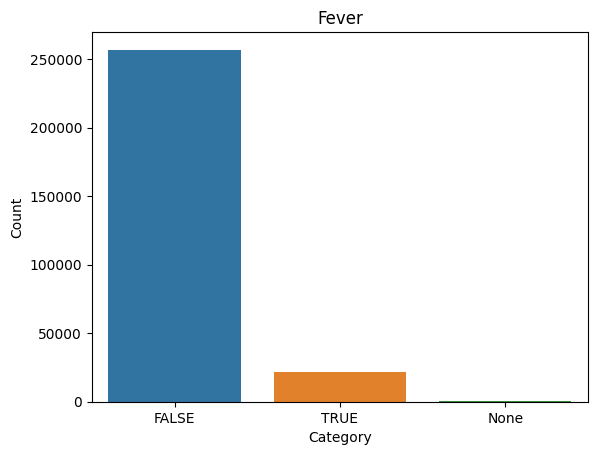

In [12]:
sns.countplot(x='Fever', data=corona)
plt.title('Fever')
plt.xlabel('Category')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

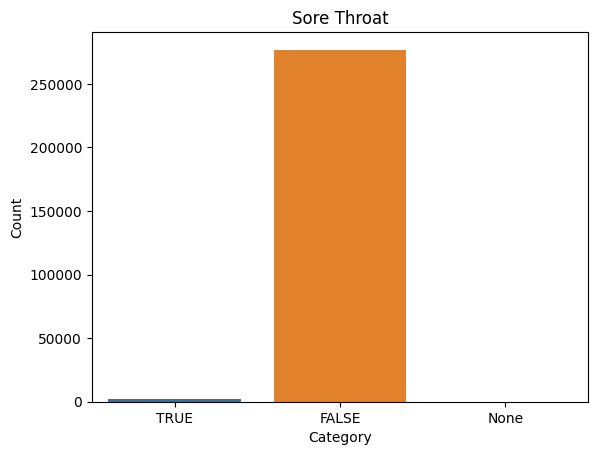

In [13]:
sns.countplot(x='Sore_throat', data=corona)
plt.title('Sore Throat')
plt.xlabel('Category')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

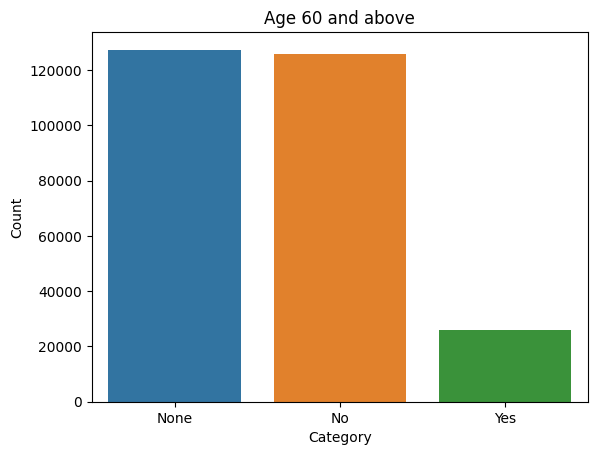

In [14]:
sns.countplot(x='Age_60_above', data=corona)
plt.title('Age 60 and above')
plt.xlabel('Category')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

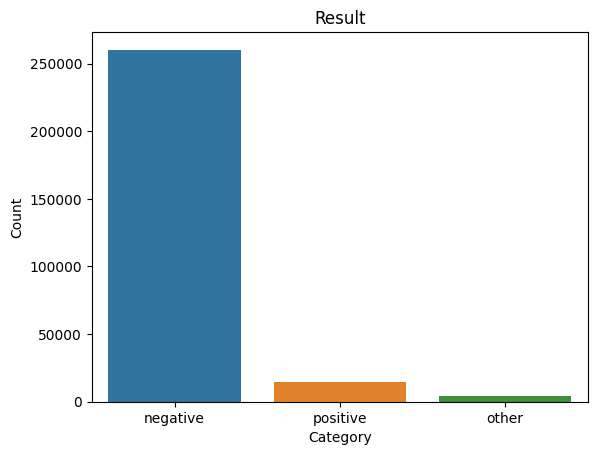

In [15]:
sns.countplot(x='Corona', data=corona)
plt.title('Result')
plt.xlabel('Category')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

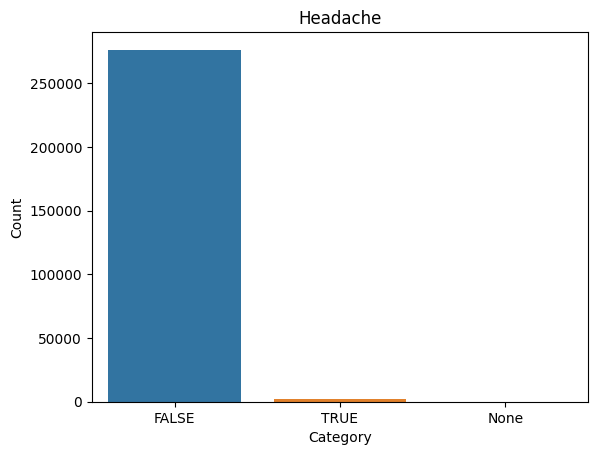

In [16]:
sns.countplot(x='Headache', data=corona)
plt.title('Headache')
plt.xlabel('Category')
plt.ylabel('Count')

In [17]:
rows = corona[corona['Cough_symptoms'] == 'None'].index

# Drop the rows from the DataFrame
corona = corona.drop(rows)

In [18]:
rows = corona[corona['Fever'] == 'None'].index

# Drop the rows from the DataFrame
corona = corona.drop(rows)

In [19]:
rows = corona[corona['Sore_throat'] == 'None'].index

# Drop the rows from the DataFrame
covid = corona.drop(rows)

In [20]:
rows = corona[corona['Shortness_of_breath'] == 'None'].index

# Drop the rows from the DataFrame
corona = corona.drop(rows)

In [21]:
rows = corona[covid['Sex'] == 'None'].index

# Drop the rows from the DataFrame
corona = corona.drop(rows)

In [22]:
rows = corona[corona['Headache'] == 'None'].index

# Drop the rows from the DataFrame
corona = corona.drop(rows)

In [23]:
rows = corona[corona['Corona'] == 'other'].index

# Drop the rows from the DataFrame
corona = corona.drop(rows)

In [24]:
for col in corona.columns:
  print('{} has {} no of unique categories'.format(col,corona[col].nunique()))

Ind_ID has 255668 no of unique categories
Test_date has 40 no of unique categories
Cough_symptoms has 2 no of unique categories
Fever has 2 no of unique categories
Sore_throat has 2 no of unique categories
Shortness_of_breath has 2 no of unique categories
Headache has 2 no of unique categories
Corona has 2 no of unique categories
Age_60_above has 3 no of unique categories
Sex has 2 no of unique categories
Known_contact has 3 no of unique categories


In [25]:
corona.shape

(255668, 11)

In [26]:
corona=pd.get_dummies(corona,columns=['Cough_symptoms', 'Fever', 'Sore_throat','Shortness_of_breath','Headache','Corona','Sex','Age_60_above','Known_contact'])

In [27]:
# Drop specified columns from the 'corona' dataset
corona = corona.drop(['Ind_ID','Cough_symptoms_FALSE', 'Fever_FALSE', 'Sore_throat_FALSE',
                      'Shortness_of_breath_FALSE', 'Headache_FALSE','Sex_female','Known_contact_Other',
                      'Corona_negative','Age_60_above_No','Age_60_above_None'], axis=1)

# Define a dictionary for column name modification
modified_columns = {'Cough_symptoms_TRUE': 'Cough_Symptoms', 'Fever_TRUE': 'Fever',
                    'Sore_throat_TRUE': 'Sore_Throat', 'Shortness_of_breath_TRUE': 'Shortness_Of_Breath',
                    'Headache_TRUE': 'Headache','Sex_male':'Gender','Known_contact_Abroad':'Abroad',
                    'Known_contact_Contact with confirmed':'Contact_with_confirmed',
                    'Age_60_above_Yes':'Age_60_and_above','Corona_positive':'Covid_Report'}

# Rename columns using the defined dictionary
corona.rename(columns=modified_columns, inplace=True)




In [28]:
corona

,Test_date,Cough_Symptoms,Fever,Sore_Throat,Shortness_Of_Breath,Headache,Covid_Report,Gender,Age_60_and_above,Abroad,Contact_with_confirmed
13727,22-03-2020,1,0,0,0,0,0,1,0,1,0
13728,22-03-2020,1,0,0,0,0,0,0,0,1,0
13730,22-03-2020,1,1,0,0,0,1,0,1,0,0
13734,22-03-2020,0,0,0,0,0,0,1,0,0,0
13735,22-03-2020,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
278843,30-04-2020,0,0,0,0,0,1,1,0,0,0
278844,30-04-2020,0,0,0,0,0,0,0,0,0,0
278845,30-04-2020,0,0,0,0,0,0,1,0,0,0
278846,30-04-2020,0,0,0,0,0,0,1,0,0,0


<ipython-input-29-7b32968aadfa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(corona.corr(), annot=True);


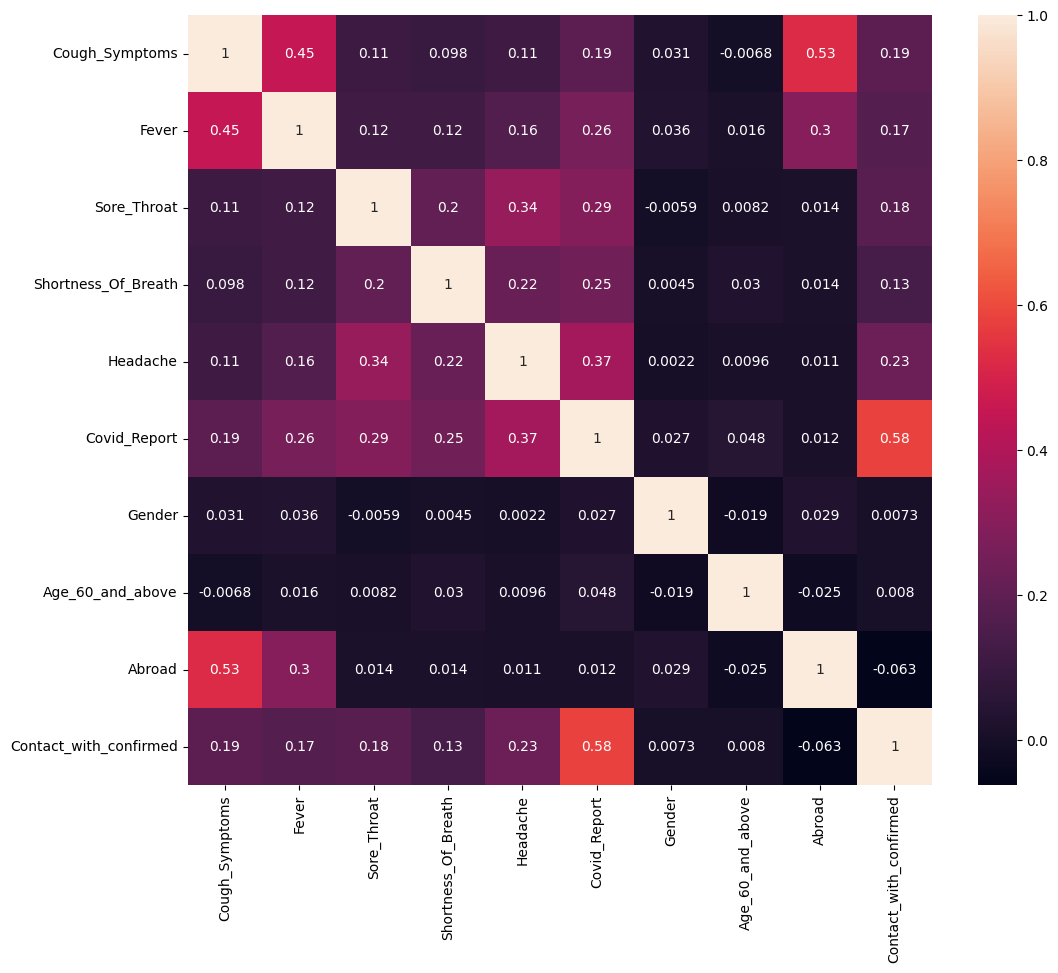

In [29]:
plt.figure(figsize=(12,10))
sns.heatmap(corona.corr(), annot=True);

In [30]:
# Dropping Age_60_above as it has very low corelation with the Covid_Report
corona_m=corona.copy()
corona_m= corona_m.drop(columns=['Age_60_and_above'])

In [31]:
X = corona_m.drop(columns=['Covid_Report'],axis=1)
y = corona_m['Covid_Report']

Text(0, 0.5, 'Count')

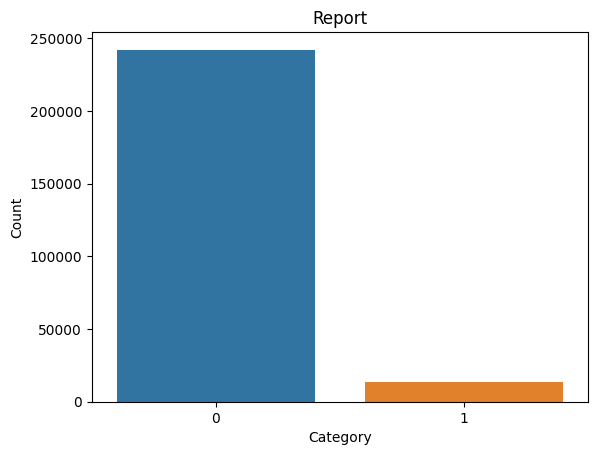

In [32]:
sns.countplot(x='Covid_Report', data=corona_m)
plt.title('Report')
plt.xlabel('Category')
plt.ylabel('Count')

In [33]:
# Import the necessary function from scikit-learn
from sklearn.utils import resample

# Identify positive and negative samples in the COVID-19 reporting dataset
positive_samples = corona_m[corona_m["Covid_Report"] == 1]
negative_samples = corona_m[corona_m["Covid_Report"] == 0]

# Address class imbalance by oversampling the minority class (positive samples)
positive_samples_upsampled = resample(positive_samples, replace=True, n_samples=len(negative_samples), random_state=42)

# Combine the oversampled positive samples with the original negative samples
corona_balanced = pd.concat([negative_samples, positive_samples_upsampled])

# Display the class counts of the now balanced dataset
print(corona_balanced["Covid_Report"].value_counts())



0    242136
1    242136
Name: Covid_Report, dtype: int64


In [34]:
# Splitting the dataset into dependent and independent features
X = corona_balanced.drop(columns=['Covid_Report'])

y = corona_balanced['Covid_Report']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
corona_balanced['Test_date'] = pd.to_datetime(corona_balanced['Test_date'], dayfirst=True)

# Splitting into training and validation sets (11th March to 15th April)
train_val = corona_balanced[(corona_balanced['Test_date'] >= '2020-03-11') & (corona_balanced['Test_date'] <= '2020-04-15')]
# Splitting into test set (16th April to 30th April)
test = corona_balanced[(corona_balanced['Test_date'] >= '2020-04-16') & (corona_balanced['Test_date'] <= '2020-04-30')]

# Further dividing training and validation sets
train, val = train_test_split(train_val, test_size=0.2,random_state=42)

# Define the target variable 'y' and features 'X'
y_train = train['Covid_Report']
X_train = train.drop(columns=['Covid_Report', 'Test_date'])

y_val = val['Covid_Report']
X_val = val.drop(columns=['Covid_Report', 'Test_date'])

y_test = test['Covid_Report']
X_test = test.drop(columns=['Covid_Report', 'Test_date'])

# Displaying the shapes of the sets
print("Training shapes:", X_train.shape, y_train.shape)
print("Validation shapes:", X_val.shape, y_val.shape)
print("Test shapes:", X_test.shape, y_test.shape)

Training shapes: (261548, 8) (261548,)
Validation shapes: (65388, 8) (65388,)
Test shapes: (157336, 8) (157336,)


**Logistic Regression**

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import accuracy_score, classification_report

In [38]:
# Create a Logistic Regression model and train it on the training set
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model's performance
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
classification_report_str = classification_report(y_val, y_pred, zero_division=1)

# Display the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:\n", classification_report_str)


Accuracy: 0.8393894904263779
Precision: 0.9346635248033786
Recall: 0.7849597779434064
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.92      0.82     26479
           1       0.93      0.78      0.85     38909

    accuracy                           0.84     65388
   macro avg       0.84      0.85      0.84     65388
weighted avg       0.86      0.84      0.84     65388



**Decision Tree Classifier**

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree

In [40]:
classification = DecisionTreeClassifier()
# Train Decision Tree Classifer
classification = classification.fit(X_train,y_train)
y_pred = classification.predict(X_test)

In [41]:
print(f"Decision tree classifier training set accuracy: {format(classification.score(X_train, y_train), '.2f')} ")
print(f"Decision tree classifier testing set accuracy: {format(classification.score(X_test, y_test), '.2f')} ")

Decision tree classifier training set accuracy: 0.86 
Decision tree classifier testing set accuracy: 0.84 


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89    109716
           1       0.75      0.69      0.72     47620

    accuracy                           0.84    157336
   macro avg       0.81      0.80      0.80    157336
weighted avg       0.83      0.84      0.83    157336



In [43]:
# Criteria= entropy
classification = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
# Train Decision Tree Classifer
classification = classification.fit(X_train,y_train)
y_pred = classification.predict(X_test)

In [44]:
print(f"Decision tree classifier training set accuracy: {format(classification.score(X_train, y_train), '.2f')} ")
print(f"Decision tree classifier testing set accuracy: {format(classification.score(X_test, y_test), '.2f')} ")

Decision tree classifier training set accuracy: 0.82 
Decision tree classifier testing set accuracy: 0.82 


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87    109716
           1       0.71      0.70      0.70     47620

    accuracy                           0.82    157336
   macro avg       0.79      0.79      0.79    157336
weighted avg       0.82      0.82      0.82    157336



**Random Forest Classifier**

In [46]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [47]:
y_pred= classifier.predict(X_test)

In [48]:
print(f"Random Forest training set accuracy: {format(classifier.score(X_train, y_train), '.2f')} ")
print(f"Random Forest testing set accuracy: {format(classifier.score(X_test, y_test), '.2f')} ")

Random Forest training set accuracy: 0.86 
Random Forest testing set accuracy: 0.84 


**Naive Bayes Classifier**

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Create a Gaussian Naive Bayes model and train it on the training set
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the Naive Bayes model's performance
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
classification_report_str = classification_report(y_val, y_pred)

# Display the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:\n", classification_report_str)



Accuracy: 0.7824371444301707
Precision: 0.9808688875901033
Recall: 0.6469968387776607
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.98      0.79     26479
           1       0.98      0.65      0.78     38909

    accuracy                           0.78     65388
   macro avg       0.82      0.81      0.78     65388
weighted avg       0.85      0.78      0.78     65388



Why is your proposal important in today’s world? How predicting a disease accurately can improve medical treatment?

-

How is it going to impact the medical field when it comes to effective screening and reducing health care burden.

-

If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any other disease.

-

**Conclusion**
- In terms of model accuarcy Decision tree and Random Forest Performed the best among other models.
- For feature selection used correlation matrix eliminated Age_60_and_above feature.
- For Feature encoding used One-hot encoding.
- Used different criteria like gini and entropy to improve model performance.
- Null Hypothesis Accepted.

# Queries

In [50]:
corona['Test_date'] = pd.to_datetime(corona['Test_date'], format='%d-%m-%Y').dt.strftime('%Y-%m-%d')

In [51]:
import duckdb
conn=duckdb.connect()

In [52]:
conn.register("Coronavirus",corona)

In [53]:
conn.execute("select Count(*) from corona where Covid_Report = 1 and Shortness_Of_Breath = 1;").fetchdf()

,count_star()
0,979


In [54]:
conn.execute("select Count(*) from corona where Fever = 1 and Covid_Report = 0 and Sore_Throat = 1;").fetchdf()

,count_star()
0,50


In [55]:
conn.execute("Select Month(Cast(Test_date as date)) ,count(*),rank() over (order by count(*) desc) from corona where Covid_Report = 1 group by Month(Cast(Test_date AS date)) order by 2 DESC;").fetchdf()

,month(CAST(Test_date AS DATE)),count_star(),rank() OVER (ORDER BY count_star() DESC)
0,4,8772,1
1,3,4760,2


In [56]:
conn.execute("select count(*) from corona where Covid_Report =1 and Gender = 1 and Headache = 1 and Cough_Symptoms = 1 ;").fetchdf()

,count_star()
0,615


In [57]:
conn.execute("select count(*) from corona where Shortness_Of_Breath = 1 and Age_60_and_above = 1 and Covid_Report = 1;").fetchdf()

,count_star()
0,227


In [58]:
conn.execute("select sum(Cough_Symptoms), sum(Fever),sum(Sore_Throat), sum(Shortness_Of_Breath) , sum(Headache) FROM corona where Covid_Report = 1 group by Covid_Report ;").fetchdf()

,sum(Cough_Symptoms),sum(Fever),sum(Sore_Throat),sum(Shortness_Of_Breath),sum(Headache)
0,6064.0,5040.0,1359.0,979.0,2005.0


In [59]:
conn.execute("select sum(Cough_Symptoms), sum(Fever),sum(Sore_Throat), sum(Shortness_Of_Breath) , sum(Headache) FROM corona where Covid_Report = 0 group by Covid_Report ;").fetchdf()

,sum(Cough_Symptoms),sum(Fever),sum(Sore_Throat),sum(Shortness_Of_Breath),sum(Headache)
0,32988.0,14814.0,137.0,99.0,98.0


In [60]:
conn.execute("select sum(Cough_Symptoms), SUM(Fever), sum(Sore_Throat), sum(Shortness_Of_Breath), sum(Headache) from corona where Covid_Report = 1 and Gender = 1  and Abroad = 1 group by gender, Abroad;").fetchdf()

,sum(Cough_Symptoms),sum(Fever),sum(Sore_Throat),sum(Shortness_Of_Breath),sum(Headache)
0,532.0,407.0,87.0,84.0,129.0
